In [3]:
#데이터 로드
import pandas as pd
df = pd.read_csv('C:/Users/dlwnr/graduation_thesis/data/use_data/2021년-서울서베이-시민_데이터.csv')

In [4]:
#종속 변수
dependent_variable=df['Q22']

In [5]:
#종속변수 기술통계정보
dependent_variable.describe()

count    5000.000000
mean        5.306000
std         2.257827
min         0.000000
25%         4.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: Q22, dtype: float64

shapiro.test

shapiro-wilk test:  정규성을 검정하는 방법.

예제


null hypothesis(H0; 귀무가설) 는 " 데이터가 정규분포를 따른다 " 이고,
Alternative hypothesis(H1; 대립가설) 은 " 데이터가 정규분포를 따르지 않는다 " 이다.

이렇게 획득한 shapiro-wilk test 결과, p-value 가 alpha level 보다 작을 경우 귀무가설을 reject하고 대립가설을 채택; p-value 가 alpha level보다 클 경우 대립가설을 reject하고 귀무가설을 채택.

p-value 작으면 대립가설(H1) 채택

### **1.종속변수**

#### **shapiro-wilk test**

In [15]:
import numpy as np
# 정규분포에서 난수 생성
rand = np.random.normal(loc=0, scale=1, size=5000)
rand

array([-0.0570292 , -1.6037821 ,  0.4967152 , ...,  0.74753464,
       -0.30698471,  0.06285897])

In [14]:
#shapiro-wilk test
import scipy.stats  as stats
test_stat, p_val = stats.shapiro(dependent_variable)
print("test-statistics:{}, p-value:{}".format(test_stat,p_val))

test-statistics:0.9501851201057434, p-value:3.307592104808233e-38


 종속변수가 정규성을 만족하는지 조사해보면 shapiro.test의 결과 p값이 0.05보다 작은 
값으로 ( p-value < 2.2e-16) 귀무가설을 기각하여 정규성을 가정하지 않는다고 할 수 있다. 그러나 데이터 수가 30개 이상인 5000개 이므로 중심극한정리에 의해서 정규성을 가정한다고 
할 수 있다.

### **2.설명변수**

#### **2-1 성별**

In [23]:
df['SEX'].value_counts()

2    2584
1    2416
Name: SEX, dtype: int64

In [37]:
df1 = df[['SEX','Q22']]
grouped = df1.groupby('SEX')
grouped.agg(['min','max','mean','std'])

Q22                        
    min max      mean       std
SEX                            
1     0  10  5.180050  2.261998
2     0  10  5.423762  2.247981

In [50]:
df['SEX'].value_counts()

2    2584
1    2416
Name: SEX, dtype: int64

<AxesSubplot:>

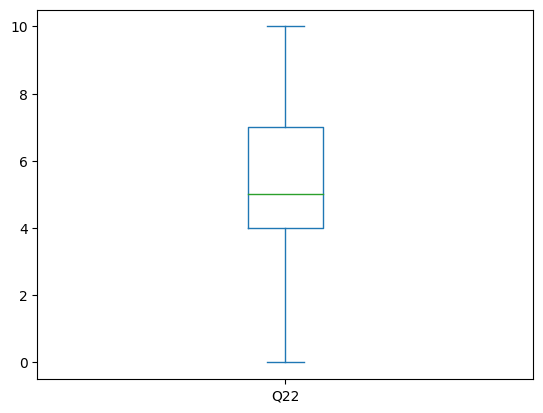

In [59]:
man = df.loc[(df['SEX'] == 1)]
man['Q22'].plot.box()

<AxesSubplot:xlabel='SEX', ylabel='Q22'>

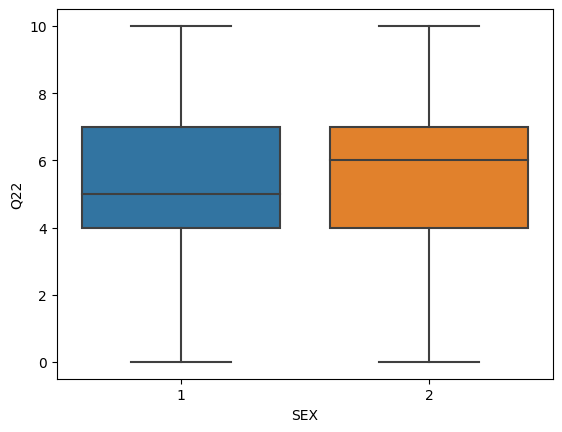

In [60]:
import seaborn as sns
sns.boxplot(y='Q22',x='SEX',data=df)


In [65]:
import plotly.express as px

fig = px.box(df, x="SEX", y="Q22")
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [ ]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm